# Desafio 1

### Importacion de librerias y base de datos

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_location = "../Data/properati.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)
data.sample()

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
36174,36174,sell,store,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6105132,-58.411552",-34.610513,...,NaN,2142.857143,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18g8j_venta_local_...,"LOCALBALVANERA, LOCAL EN VENTA !!!CON RENTAAPT...",LOCAL EN VENTA,https://thumbs4.properati.com/3/Zywr5zMPWQX-C_...


Limpieza y ordenamiento de las columnas "floor" y "rooms" basados en el tipo de propiedad y la exploracion de los campos "description" y "title"

In [3]:
dataFiltrada = data.loc[:, ['property_type', 'floor', 'rooms', 'description', 'title']]
dataFiltrada['description'] = dataFiltrada['description'].str.lower()
dataFiltrada['title'] = dataFiltrada['title'].str.lower()
dataFiltrada.sample()
display(dataFiltrada.sample(5))
dataFiltrada.dtypes

,property_type,floor,rooms,description,title
93978,apartment,NaN,NaN,"dpto apto profesional, 28mts, ideal inversor. ...",microcentro 1 amb apto profesional
43876,apartment,NaN,4.0,excelente triplex ubicado en dorado y de las a...,2209 - dorado 923 uf 2
118285,apartment,NaN,NaN,este emprendimiento se encuentra en una de las...,departamento - general paz
86524,house,NaN,NaN,descripción excelente chalet en una de las mej...,casa en adrogue
15884,apartment,NaN,NaN,hermoso departamento ubicado a 3 cuadras y med...,departamento en villa carlos paz


property_type     object
floor            float64
rooms            float64
description       object
title             object
dtype: object

Las variables tienen el tipo correcto de datos para el analisis.
Chequeo nulos en el campo "property_type" y valores

In [4]:
print(dataFiltrada.property_type.value_counts())
print(dataFiltrada.property_type.isnull().sum())

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64
0


Nuevas columnas que son copia de las originales rooms_clean y floor_clean

In [5]:
dataFiltrada['rooms_clean'] = dataFiltrada['rooms']
dataFiltrada['floor_clean'] = dataFiltrada['floor']

In [6]:
dataFiltrada.sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
116757,apartment,NaN,NaN,excelente unidad de 3 ambientes con vista pano...,semi piso 3 ambientes con vista al rio y coche...,NaN,NaN


Los tipos de propiedad no tienen valores nulos y estan organizados en 4 categorias, se infiere que la seleccion de este campo es a traves de una lista definida. Esto nos permite organizar el dataframe por el campo de tipo de propiedad si es necesario.

### Tratamiento de rooms

In [7]:
import re

In [8]:
numeroAmbientesPattern = '(?P<numero>\d{1})\s?(ambientes|amb)'
regexAmbientes = re.compile(numeroAmbientesPattern)

In [9]:
descriptionObject = dataFiltrada.description
ambientesMatches = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))


In [10]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask = dataFiltrada.rooms_clean.isnull() & ambientesMatches.notnull()



73830


In [11]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask, 'rooms_clean'] = ambientesMatches[roomsAmbientesMask].apply(lambda x: float(x.group("numero")))

print(dataFiltrada.rooms_clean.isnull().sum())



73830
54769


Mismo regex sobre columna Title

In [12]:
#numeroAmbientesPattern = '(?P<numero>\d{1})\s?(ambientes|amb)'
#regexAmbientes = re.compile(numeroAmbientesPattern)

In [13]:
titleObject = dataFiltrada.title
ambientesMatches2 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))


In [14]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask2 = dataFiltrada.rooms_clean.isnull() & ambientesMatches2.notnull()



54769


In [15]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask2, 'rooms_clean'] = ambientesMatches2[roomsAmbientesMask2].apply(lambda x: float(x.group("numero")))

print(dataFiltrada.rooms_clean.isnull().sum())



54769
52131


Segundo criterio de regex para los ambientes

In [16]:
def pasarANumero (x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'cero':0, 'uno':1, 'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr]
    return resultado

    

In [17]:
numeroAmbientesPattern2 = '(?P<numeroPalabra>dos|tres|cuatro|cinco|seis|siete|ocho)\s?(ambientes|amb)'
regexAmbientes2 = re.compile(numeroAmbientesPattern2)

In [18]:
#descriptionObject = dataFiltrada.description
ambientesMatches3 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))


In [19]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask3 = dataFiltrada.rooms_clean.isnull() & ambientesMatches3.notnull()

print(ambientesMatches3[8].group('numeroPalabra'))

52131
dos


In [20]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask3, 'rooms_clean'] = ambientesMatches3[roomsAmbientesMask3].apply(pasarANumero)

print(dataFiltrada.rooms_clean.isnull().sum())



52131
50195


Ahora sobre title con el regex 2 de ambientes

In [21]:
titleObject = dataFiltrada.title
ambientesMatches4 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))


In [22]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask4 = dataFiltrada.rooms_clean.isnull() & ambientesMatches4.notnull()


50195


In [23]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask4, 'rooms_clean'] = ambientesMatches4[roomsAmbientesMask4].apply(pasarANumero)

print(dataFiltrada.rooms_clean.isnull().sum())



50195
49928


Ahora aplicamos un tercer regex en busqueda de dormitorios para completar los faltantes de ambientes.

In [24]:
numeroAmbientesPattern3 = '(?P<numeroPalabra>dos|tres|cuatro|cinco|seis|siete|ocho)\s?(dormitorios|dorm|cuartos|hab|habitaciones)'
regexAmbientes3 = re.compile(numeroAmbientesPattern3)




In [25]:
def pasarANumeroDormi (x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'cero':0, 'un':1, 'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr] + 1
    return resultado

In [26]:
descriptionObject = dataFiltrada.description
ambientesMatches5 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))


In [27]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask5 = dataFiltrada.rooms_clean.isnull() & ambientesMatches5.notnull()

print(ambientesMatches5[5].group('numeroPalabra'))

49928
dos


In [28]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask5, 'rooms_clean'] = ambientesMatches5[roomsAmbientesMask5].apply(pasarANumeroDormi)

print(dataFiltrada.rooms_clean.isnull().sum())



49928
39864


Tercer regex sobre title

In [29]:

ambientesMatches6 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))


In [30]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask6 = dataFiltrada.rooms_clean.isnull() & ambientesMatches6.notnull()

print(ambientesMatches6[5].group('numeroPalabra'))

39864
dos


In [31]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask6, 'rooms_clean'] = ambientesMatches6[roomsAmbientesMask6].apply(pasarANumeroDormi)

print(dataFiltrada.rooms_clean.isnull().sum())



39864
39762


Aplicamos el regex 4 para detectar numero de dormitorios en description

In [32]:
numeroAmbientesPattern4 = '(?P<numero>\d{1})\s?(dormitorios|dorm|cuartos|hab|habitaciones)'
regexAmbientes4 = re.compile(numeroAmbientesPattern4)



In [33]:

ambientesMatches7 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))


In [34]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask7 = dataFiltrada.rooms_clean.isnull() & ambientesMatches7.notnull()

print(ambientesMatches7[4].group('numero'))

39762
1


In [35]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask7, 'rooms_clean'] = ambientesMatches7[roomsAmbientesMask7].apply(lambda x: float(x.group("numero")) + 1)

print(dataFiltrada.rooms_clean.isnull().sum())



39762
21391


Cuarto regex sobre title

In [36]:

ambientesMatches8 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))


In [37]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask8 = dataFiltrada.rooms_clean.isnull() & ambientesMatches8.notnull()

print(ambientesMatches8[1].group('numero'))

21391
2


In [38]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask8, 'rooms_clean'] = ambientesMatches8[roomsAmbientesMask8].apply(lambda x: float(x.group("numero")) + 1)

print(dataFiltrada.rooms_clean.isnull().sum())



21391
20906


Quinto regex para detectar monoambientes sobre description. "un/1 ambiente"

In [39]:
numeroAmbientesPattern5 = '(?P<numeroPalabra>un|1|mono)\s?(ambientes|amb)'
regexAmbientes5 = re.compile(numeroAmbientesPattern5)

In [40]:

ambientesMatches8 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))


In [41]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask8 = dataFiltrada.rooms_clean.isnull() & ambientesMatches8.notnull()

print(ambientesMatches8[7].group('numeroPalabra'))

20906
mono


In [42]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask8, 'rooms_clean'] = ambientesMatches8[roomsAmbientesMask8].apply(lambda x: float(1.0))

print(dataFiltrada.rooms_clean.isnull().sum())



20906
17436


In [43]:

ambientesMatches9 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))


In [44]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask9 = dataFiltrada.rooms_clean.isnull() & ambientesMatches9.notnull()

print(ambientesMatches9[7].group('numeroPalabra'))

17436
mono


In [45]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask9, 'rooms_clean'] = ambientesMatches9[roomsAmbientesMask9].apply(lambda x: float(1.0))

print(dataFiltrada.rooms_clean.isnull().sum())



17436
17259


Regex numero 6 para detectar un dormitorio

In [46]:
numeroAmbientesPattern6 = '(?P<numeroPalabra>un|1)\s?(cuarto|dormi|hab)'
regexAmbientes6 = re.compile(numeroAmbientesPattern6)

In [47]:

ambientesMatches10 = descriptionObject.apply(lambda x: x if x is np.NaN else regexAmbientes6.search(x))


In [48]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask10 = dataFiltrada.rooms_clean.isnull() & ambientesMatches10.notnull()

print(ambientesMatches10[4].group('numeroPalabra'))

17259
1


In [49]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask10, 'rooms_clean'] = ambientesMatches10[roomsAmbientesMask10].apply(lambda x: float(1.0)+1)

print(dataFiltrada.rooms_clean.isnull().sum())



17259
15759


In [50]:

ambientesMatches11 = titleObject.apply(lambda x: x if x is np.NaN else regexAmbientes6.search(x))


In [51]:
print(dataFiltrada.rooms_clean.isnull().sum())
roomsAmbientesMask11 = dataFiltrada.rooms_clean.isnull() & ambientesMatches11.notnull()



15759


In [52]:
print(dataFiltrada.rooms_clean.isnull().sum())
dataFiltrada.loc[roomsAmbientesMask11, 'rooms_clean'] = ambientesMatches11[roomsAmbientesMask11].apply(lambda x: float(1.0)+1)

print(dataFiltrada.rooms_clean.isnull().sum())



15759
15729


In [53]:
pd.options.display.max_colwidth = 1000
print(dataFiltrada.rooms.isnull().sum())
print(dataFiltrada.rooms_clean.isnull().sum())
postAmbientesRegexMask = dataFiltrada.rooms_clean.isnull()
dataFiltrada.loc[postAmbientesRegexMask,['description', 'title']]

73830
15729


,description,title
27,"estancias propone vivir rodeados de naturaleza y verde. por este motivo se destinó el 50% del emprendimiento a espacios comunes con una parquización diseñada por el estudio thays. además de reservar algunos espacios en su estado natural para garantizar una mejor calidad de vida. la ribera del río luján y el bosque natural de acacias le permiten a los habitantes de estancias tener un contacto diario con la naturaleza en su estado puro. donde la mano del hombre solo ha intervenido para asegurar su conservación. barrio la pioneraen cumplimiento de la ley 2340 cucicba, ley 10.973 de la prov.bs.as., ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la i...",excelente propiedad!!!! en estancias del pilar
47,estructura ecologica flotanteideal para ubicar en centro nauticomateriales eps normas de calidad din 4102 y r1 según abnt mb 1562 y ensayado por el inti según iram 11918. trasladables por aguatransportables por tierrabiodigestor para tratamiento de aguasprotección galvanizada en toda la estructuracerramientos de aluminiovidrios de seguridad a/a frio calordoble circuitos de agua instalación eléctrica,float life - casa flotante - ubicable en clubs nauticos
49,"jpl. casa en el barrio san sebastian con bajada al lago, la casa se encuentra en construccion, ya se encuentra totalmente pintada ya sea por fuera o por dentro. esta ubicada en el area 5 de san sebastioan en un lote de 1000 m2",jpl. casa en san sebastian
57,"venta de local sobre vía pública con renta - 3 de frente x 10 de fondo - baño compartimentado - excelente ubicación - a mts. de estacionamiento - frente a importante edificio de oficinas - a 2 cuadras de subte d, cabildo y juramento, etc. - ideal para inversionista - de la paz 1970consúltenos:",local en excelente ubicación - venta con renta
58,"magnífica residencia con calidad de construcción superlativa. se trata de un chalet con frente de ladrillo a la vista y techo pizarra. desarrollado sobre un lote de 1300m2, totalmente soleado por su orientación norte y entorno privado. salida a dos calles, en el exclusivo sector de av. del libertador al río en acassuso, partido de san isidro. cuenta con garage para tres autos y entrada para varios más.pb:se ingresa a un hall de entrada muy amplio con piso de mármol botticino originario de italia.al frente se encuentra un escritorio muy privado, con biblioteca.la recepción y el comedor principal son muy amplios con inmejorables visuales hacia el jardín, tienen grandes ventanales que permiten el ingreso de mucha luz. hogar a leña.el baño principal de la planta baja tiene ingreso también por el jardín, sirviendo el mismo tanto para recepción como vestuario, ya que posee ducha.el family room se integra a la recepción, ampliando esta última. luminosa cocina con isla desayunadora, amplia...","magnífica residencia en venta, ubicada en el exclusivo sector de av. del libertador al río en acassuso."
...,...,...
121157,"torre de 16º pisos ubicado en pleno centro comercial de belgrano, sobre un lote con 23m de frenteunidades de entre 40m2 y 130m2 con flexibilidad para combinar departamentos y tipologías.sky view y gimnasio en piso 16º + pack completo de amenities interiores y exteriores en pb (terraza /parrillas/juego para niños/piscina/sum/laundry).cochera de uso mixto con servicio de valet parking para propietarios.aviso legal: las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproximados. los datos fueron proporcionados por el propietario y pueden no estar actualizados a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y d

Analisis de promedio en cantidad de ambientes segun el tipo de propiedad sobre los valores no nulos.

In [54]:
roomsNoNulosMasK = dataFiltrada.rooms_clean.notnull()
roomsNoNulos = dataFiltrada.loc[roomsNoNulosMasK, ['property_type', 'rooms_clean']]
mediaRoomsPorTipo = roomsNoNulos.groupby(['property_type']).mean()
#mediaRoomsPorTipo.rooms_clean.PH
mediaRoomsPorTipo


,rooms_clean
property_type,
PH,3.184500
apartment,2.515387
house,3.936017
store,2.933518


### Si consideramos que la cantidad de ambientes puede tener un caracter predictivo, se puede asignar a los nulos de acada tipo de propiedad el promedio para su categoria. 

In [55]:
#defino el agrupamiento
grupoPorPropiedad = dataFiltrada.groupby(['property_type'])
#transform para imputar los valores promedio por grupo
roomsNullFilled = grupoPorPropiedad['rooms_clean'].transform(lambda grp: grp.fillna(grp.mean()))
roomsNullFilled

0         2.000000
1         3.000000
2         2.000000
3         3.000000
4         2.000000
            ...   
121215    3.000000
121216    4.000000
121217    1.000000
121218    2.000000
121219    2.515387
Name: rooms_clean, Length: 121220, dtype: float64

In [56]:
roomsNullFilled.isnull().sum()

0

In [57]:
dataFiltrada['rooms_clean'] = roomsNullFilled
dataFiltrada.rooms_clean.isnull().sum()

0

## Hasta aca esta completa la columna 'rooms_clean' sobre el dataframe filtrado. ------------------------

In [58]:
import matplotlib.pyplot as plt

#propertySumPlot = dataFiltrada.property_type.value_counts()
#propertySumPlot.dtypes
plt.clf()
dataFiltrada.groupby('property_type').size().plot(kind='bar')
plt.show()


<Figure size 640x480 with 1 Axes>

### -------------------------------------------------------

### CRITERIO A ESTABLECER - Las propiedades tipo "house" y "store" imputamos NaN en el valor floor_clean.

In [59]:
houseMask = dataFiltrada.property_type == "house"
soloHouse = dataFiltrada.loc[houseMask, :]


In [60]:
print(soloHouse.shape)
print(soloHouse.floor.isnull().sum())
porcentajeNulosHouse = soloHouse.floor.isnull().sum() / soloHouse.shape[0]
print(porcentajeNulosHouse)
soloHouse.floor.value_counts()

(40268, 7)
39503
0.9810022846925599


1.0       385
2.0       290
3.0        18
8.0         4
7.0         4
14.0        3
32.0        2
10.0        2
22.0        2
6.0         2
135.0       2
5.0         2
313.0       2
1420.0      1
28.0        1
36.0        1
691.0       1
33.0        1
391.0       1
27.0        1
42.0        1
9.0         1
324.0       1
11.0        1
722.0       1
50.0        1
643.0       1
57.0        1
64.0        1
12.0        1
4.0         1
1512.0      1
21.0        1
41.0        1
15.0        1
1291.0      1
181.0       1
3150.0      1
82.0        1
252.0       1
343.0       1
201.0       1
25.0        1
26.0        1
77.0        1
403.0       1
136.0       1
338.0       1
2177.0      1
1450.0      1
384.0       1
56.0        1
1379.0      1
24.0        1
17.0        1
110.0       1
368.0       1
269.0       1
67.0        1
287.0       1
Name: floor, dtype: int64

Los valores de house que no corresponden a valores nulos son el 2% de los datos. Por esto podemos aplicar el criterio para house, con floor en NaN

In [61]:
soloHouse = soloHouse.assign(floor_clean=np.NaN)
soloHouse.floor_clean.value_counts()

Series([], Name: floor_clean, dtype: int64)

Ahora introduzco en dataFiltrada los valores para house con floor en NaN

In [62]:
dataFiltrada['floor_clean'] = soloHouse.floor_clean

In [63]:
dataFiltrada.loc[houseMask,:].sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
65524,house,NaN,NaN,excelente casa a 200 mts del shopping de villa cabrera.se desarrolla toda en planta baja.living- comedor.cocina -comedor.galeria.tres dormitorios.un baño muy amplio.cochera.patio de invierno.consultas: (0351) 155 185 520,casa - villa cabrera. 3 dormitorios. cochera.a metros del shoping de villa cabrera. (0351)155 185 520,4.0,NaN


Ahora exploramos los locales "store"

In [64]:
soloStoreMask = dataFiltrada.property_type == 'store'
soloStore = dataFiltrada.loc[soloStoreMask, :]


In [65]:
print(soloStore.shape)
print(soloStore.floor.isnull().sum())
porcentajeNulosStore = soloStore.floor.isnull().sum() / soloStore.shape[0]
print(porcentajeNulosStore)
soloStore.floor.value_counts()

(4136, 7)
4096
0.9903288201160542


1.0     24
2.0     10
19.0     1
31.0     1
53.0     1
10.0     1
14.0     1
4.0      1
Name: floor, dtype: int64

Existe un muy bajo porcentaje de valores distintos a NaN(un 1%) aplicamos el mismo criterio que para el tipo house.

In [66]:
soloStore = soloStore.assign(floor_clean=np.NaN)
soloStore.floor_clean.value_counts()
soloStore.sample()

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
20296,store,NaN,NaN,local comercial. planta baja: 3 x 9 m. a metros de santa fe,local comercial. planta baja: 3 x 9 m. a metros de santa fe,2.933518,NaN


Actualizo el dataframe con los valoers de locales en NaN

In [67]:
dataFiltrada['floor_clean'] = soloStore.floor_clean

Exploración de PH

In [68]:

phMask = dataFiltrada.property_type == "PH"
soloPH = dataFiltrada.loc[phMask, :]
soloPH.sample(5)

,property_type,floor,rooms,description,title,rooms_clean,floor_clean
11281,PH,3.0,3.0,duplex en venta de 2 dorm. en cordoba,"arguello, duplex. 3 dormitorios, venta",3.0000,NaN
6895,PH,NaN,3.0,"ph 3 amb al fondo por pasillo.en muy buenas condiciones. patio de llegada, living comedor, bano completo, 2 dormitorios bien ventilados, cocina, lavadero interno, patio interno y terraza con cuarto guarda utiles. - publicado a traves de visualgestion -",ph en venta san justo / la matanza (a017 449),3.0000,NaN
70302,PH,NaN,NaN,"excelente ubicacion. primer piso x escalera. primer piso: 2 amplios dormitorios, living comedor con 2 ventanales a calle san martin, cocina comedor diario y baño.segundo piso: habitacion, baño, sala de estar o enseres, lavadero y patio.excelente estado.apta credito“las fotos publicadas de esta propiedad no son vinculantes y tampoco contractuales”",ph - lomas de zamora,3.1845,NaN
37603,PH,NaN,NaN,"departamento tipo casa, planta baja, frente, entrada independiente.cocina comedor con pisos de porcelanato, baño completo, dormitorio de 3 x 3,40, patio con lavadero . aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).","depto tipo casa, 2 ambientes, con patio",2.0000,NaN
101126,PH,NaN,NaN,"ph 3 al frente 3 amb con escritorio en inmejorable zona de florida. cuenta con living comedor con gran ventanal y salida a un patio de 16 mts, cocina independiente, cocina comedor independiente con parrilla de material y hierro con excelente salida al exterior, baño completo, 2 dormitorios al frente con ventanales, uno de ellos con placar de techo a piso y un lugar para escritorio independiente con lugar de guardado. el mismo posee pisos de parquet, un hermoso patio, calefacción por tiro balanceado y un gran potencial para refaccionar a gusto.",ph - florida,3.0000,NaN


In [69]:

print(soloPH.shape)
print(soloPH.floor.isnull().sum())
porcentajeNulosPH = soloPH.floor.isnull().sum() / soloPH.shape[0]
print(porcentajeNulosPH)
soloPH.floor.value_counts()
#Creo que se puede hacer un corte en 3


(5751, 7)
5178
0.9003651538862807


1.0     154
2.0     146
3.0      63
6.0      42
5.0      38
7.0      31
4.0      31
8.0      12
9.0      11
11.0     10
10.0      9
12.0      8
14.0      7
13.0      7
16.0      2
15.0      1
17.0      1
Name: floor, dtype: int64

#### Si bien los PH tiene un gran porcentaje de valores nulos, podemos probar completarlo a partir de las descripciones junto a los departamentos.

In [70]:
#Mascara de solo 'PH' y 'apartment'
apartmentPHMask = (dataFiltrada.property_type == 'PH') | (dataFiltrada.property_type == 'apartment')
apartmentPHMask.head(6)

0     True
1     True
2     True
3     True
4     True
5    False
Name: property_type, dtype: bool

In [71]:
numeroPisoPattern = '(?P<numeroPiso>\d\d?\d?\s?)(er|to|mo|ro|vo|no)'
numeroPisoRegex = re.compile(numeroPisoPattern)


In [72]:
numeroPisoMatches1 = descriptionObject.apply(lambda x: x if x is np.NaN else numeroPisoRegex.search(x))


In [73]:
numeroPisosMask1 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches1.notnull() & apartmentPHMask
numeroPisosMask1

0         False
1         False
2          True
3         False
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Length: 121220, dtype: bool

In [74]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask1, 'floor_clean'] = numeroPisoMatches1[numeroPisosMask1].apply(lambda x: float(x.group("numeroPiso")))
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

76816
-------------
69764


Mismo regex sobre campo title

In [75]:
numeroPisoMatches2 = titleObject.apply(lambda x: x if x is np.NaN else numeroPisoRegex.search(x))
numeroPisosMask2 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches2.notnull() & apartmentPHMask
numeroPisosMask2


0         False
1         False
2         False
3         False
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Length: 121220, dtype: bool

In [76]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask2, 'floor_clean'] = numeroPisoMatches2[numeroPisosMask2].apply(lambda x: float(x.group("numeroPiso")))
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

69764
-------------
69590


Nuevo reges para detectar numero de piso.

In [77]:
numeroPisoPattern2 = 'piso\s?(?P<numeroPiso>\d\d?\d?)[^er|to|mo|ro|vo|no|do]'
numeroPisoRegex2 = re.compile(numeroPisoPattern2)



In [78]:
numeroPisoMatches3 = descriptionObject.apply(lambda x: x if x is np.NaN else numeroPisoRegex2.search(x))


In [79]:
numeroPisosMask3 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches3.notnull() & apartmentPHMask


In [80]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask3, 'floor_clean'] = numeroPisoMatches3[numeroPisosMask3].apply(lambda x: float(x.group("numeroPiso")) if x.group("numeroPiso") else x)
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

69590
-------------
66070


In [81]:
numeroPisoMatches4 = titleObject.apply(lambda x: x if x is np.NaN else numeroPisoRegex2.search(x))


In [82]:
numeroPisosMask4 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches4.notnull() & apartmentPHMask


In [83]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask4, 'floor_clean'] = numeroPisoMatches4[numeroPisosMask4].apply(lambda x: float(x.group("numeroPiso")) if x.group("numeroPiso") else x)
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

66070
-------------
65646


Regex para nombre de piso.

In [84]:
nombrePisoPattern3 = '(?P<pisoPalabra>primer|segundo|tercero|cuarto|quinto|sexto|septimo|octavo|noveno|decimo)\spiso\s'
nombrePisoRegex3 = re.compile(nombrePisoPattern3)



In [85]:
numeroPisoMatches5 = descriptionObject.apply(lambda x: x if x is np.NaN else nombrePisoRegex3.search(x))

In [86]:
numeroPisosMask5 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches5.notnull() & apartmentPHMask

In [87]:
def nombreNumero (valor):
    nombre = valor.group('pisoPalabra')
    aNumero = {'primer':1, 'segundo':2, 'tercero':3, 'cuarto':4, 'quinto':5, 'sexto':6, 'septimo':7, 'octavo':8, 'noveno':9, 'decimo':10}
    resultado = aNumero[nombre]
    return resultado

In [88]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask5, 'floor_clean'] = numeroPisoMatches5[numeroPisosMask5].apply(nombreNumero)
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

65646
-------------
62728


In [89]:
numeroPisoMatches6 = titleObject.apply(lambda x: x if x is np.NaN else nombrePisoRegex3.search(x))

In [90]:
numeroPisosMask6 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches6.notnull() & apartmentPHMask

In [91]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask6, 'floor_clean'] = numeroPisoMatches6[numeroPisosMask6].apply(nombreNumero)
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

62728
-------------
62699


Regex de piso con caracter especial º

In [92]:
nombrePisoPattern4 = '(?P<numeroPiso>\d\d?)\º\s?piso'
nombrePisoRegex4 = re.compile(nombrePisoPattern4)



In [93]:
numeroPisoMatches7 = descriptionObject.apply(lambda x: x if x is np.NaN else nombrePisoRegex4.search(x))

In [94]:
numeroPisosMask7 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches7.notnull() & apartmentPHMask

In [95]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask7, 'floor_clean'] = numeroPisoMatches7[numeroPisosMask7].apply(lambda x: float(x.group("numeroPiso")) )
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

62699
-------------
61158


In [96]:
numeroPisoMatches8 = titleObject.apply(lambda x: x if x is np.NaN else nombrePisoRegex4.search(x))

In [97]:
numeroPisosMask8 = dataFiltrada.floor_clean.isnull() & numeroPisoMatches8.notnull() & apartmentPHMask

In [98]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[numeroPisosMask8, 'floor_clean'] = numeroPisoMatches8[numeroPisosMask8].apply(lambda x: float(x.group("numeroPiso")) )
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

61158
-------------
61117


In [99]:
dataFiltrada.loc[apartmentPHMask, 'floor_clean'].value_counts()

1.0      4306
2.0      3322
3.0      1332
4.0      1080
7.0       623
         ... 
701.0       1
92.0        1
350.0       1
205.0       1
540.0       1
Name: floor_clean, Length: 342, dtype: int64

### En argentina el edificio mas alto del país tiene 54 pisos.

Por lo tanto podemos hacer un corte en el piso 54 y asignar NaN a los que esten por encima de ese valor.

In [100]:
dataFiltrada.loc[apartmentPHMask, 'floor_clean'] = dataFiltrada.floor_clean[apartmentPHMask].apply(lambda x: x if x<55 else np.NaN)
dataFiltrada.loc[apartmentPHMask, 'floor_clean'].value_counts()

1.0     4306
2.0     3322
3.0     1332
4.0     1080
7.0      623
5.0      616
6.0      616
8.0      425
9.0      375
10.0     365
12.0     280
14.0     233
11.0     228
15.0     191
0.0      146
13.0     123
16.0     119
18.0     111
17.0      81
19.0      72
28.0      36
21.0      32
20.0      29
24.0      23
23.0      18
35.0      16
25.0      16
34.0      16
40.0      14
27.0      14
22.0      13
26.0      12
50.0      12
48.0      12
32.0       7
46.0       7
31.0       7
29.0       6
30.0       6
33.0       4
49.0       4
36.0       4
45.0       4
39.0       4
41.0       3
42.0       3
52.0       3
47.0       3
37.0       2
54.0       1
51.0       1
53.0       1
Name: floor_clean, dtype: int64

In [101]:
import seaborn as sns

In [106]:
nulosApartmentPHMask = dataFiltrada.loc[apartmentPHMask, "floor_clean"].isnull()

### Detección de planta baja sobre los valores nulos de apartment y PH

In [107]:
pbPattern = 'planta\s?baja\s?'
pbRegex = re.compile(pbPattern)
pbMatches = descriptionObject.apply(lambda x: x if x is np.NaN else pbRegex.search(x))

pbMatches




0         <re.Match object; span=(22, 34), match='planta baja '>
1                                                           None
2                                                           None
3                                                           None
4                                                           None
                                   ...                          
121215                                                      None
121216                                                      None
121217                                                      None
121218                                                      None
121219                                                      None
Name: description, Length: 121220, dtype: object

In [108]:
pbMask = nulosApartmentPHMask & pbMatches.notnull()

In [109]:
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())
dataFiltrada.loc[pbMask, 'floor_clean'] = pbMatches[pbMask].apply(lambda x: 0)
print('-------------')
print(dataFiltrada.loc[apartmentPHMask, 'floor_clean'].isnull().sum())

61839
-------------
54368


[(0, 20)]

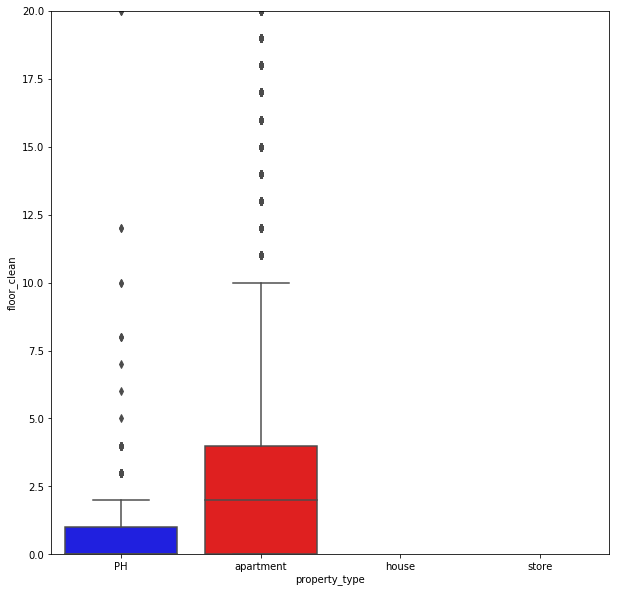

In [113]:
fig, axs = plt.subplots(figsize=(10,10))

floorsFig = sns.boxplot("property_type", "floor_clean", data=dataFiltrada,
               palette=["blue", "red"])
floorsFig.set(ylim=(0, 20))

### Posibles rangos 0a3 4a10 >11